# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.735863e+01     1.267983e+01
 * time: 0.0013918876647949219
     1     3.137800e+01     8.446406e+00
 * time: 0.006342887878417969
     2     2.599731e+01     3.497033e+00
 * time: 0.012074947357177734
     3     2.199225e+01     2.049496e+00
 * time: 0.01693892478942871
     4     2.025652e+01     2.511650e+00
 * time: 0.021771907806396484
     5     1.994733e+01     4.240544e+00
 * time: 0.02572178840637207
     6     1.924384e+01     1.764189e+00
 * time: 0.03058481216430664
     7     1.864399e+01     1.506904e+00
 * time: 0.0344698429107666
     8     1.814107e+01     1.224591e+00
 * time: 0.03848600387573242
     9     1.778527e+01     9.475241e-01
 * time: 0.04241800308227539
    10     1.760790e+01     8.410493e-01
 * time: 0.046362876892089844
    11     1.744932e+01     6.359808e-01
 * time: 0.05032777786254883
    12     1.735468e+01     8.002772e-01
 * time: 0.05350184440612793
    13     1.729598e+01     1.081111e+00
 * 

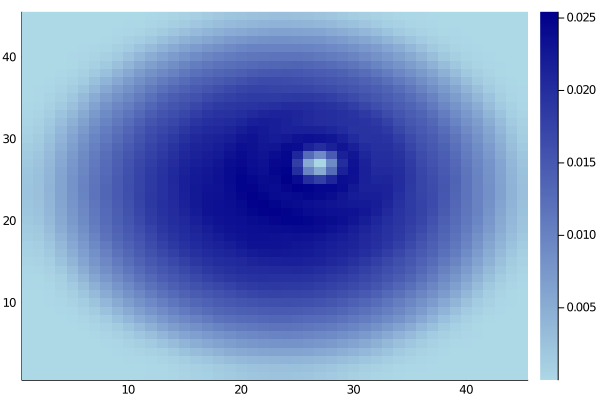

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)